In [1]:
pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder



In [3]:
df = pd.read_csv("/content/vehicle fraud .csv")

In [4]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [6]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [7]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [8]:
for column in df:
    print(column,":\n",df[column].unique(),'\n')

Month :
 ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep'] 

WeekOfMonth :
 [5 3 2 4 1] 

DayOfWeek :
 ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday'] 

Make :
 ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus'] 

AccidentArea :
 ['Urban' 'Rural'] 

DayOfWeekClaimed :
 ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0'] 

MonthClaimed :
 ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0'] 

WeekOfMonthClaimed :
 [1 4 2 3 5] 

Sex :
 ['Female' 'Male'] 

MaritalStatus :
 ['Single' 'Married' 'Widow' 'Divorced'] 

Age :
 [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66] 

Fault :
 ['Policy Holder' 'Third Party'] 

PolicyType :

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [10]:
df.describe(include= object).T

,count,unique,top,freq
Month,15420,12,Jan,1411
DayOfWeek,15420,7,Monday,2616
Make,15420,19,Pontiac,3837
AccidentArea,15420,2,Urban,13822
DayOfWeekClaimed,15420,8,Monday,3757
MonthClaimed,15420,13,Jan,1446
Sex,15420,2,Male,13000
MaritalStatus,15420,4,Married,10625
Fault,15420,2,Policy Holder,11230
PolicyType,15420,9,Sedan - Collision,5584


In [11]:
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

array([[<Axes: title={'center': 'WeekOfMonth'}>,
        <Axes: title={'center': 'WeekOfMonthClaimed'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'FraudFound_P'}>,
        <Axes: title={'center': 'PolicyNumber'}>,
        <Axes: title={'center': 'RepNumber'}>],
       [<Axes: title={'center': 'Deductible'}>,
        <Axes: title={'center': 'DriverRating'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

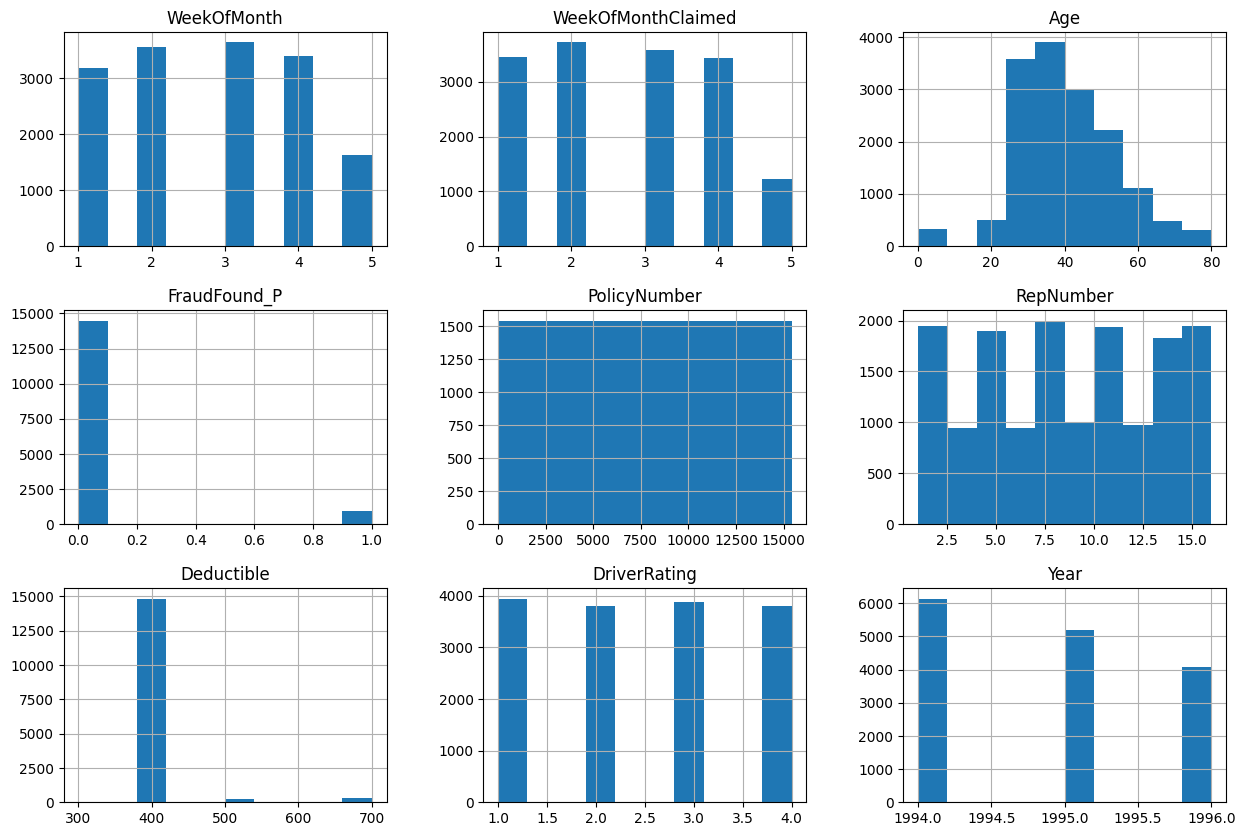

In [12]:
df.hist(figsize=(15,10))

In [13]:
df_month = df.groupby(['Month']).size().reset_index().rename(columns={0:'Num_accidents'})
df_month

,Month,Num_accidents
0,Apr,1280
1,Aug,1127
2,Dec,1285
3,Feb,1266
4,Jan,1411
5,Jul,1257
6,Jun,1321
7,Mar,1360
8,May,1367
9,Nov,1201


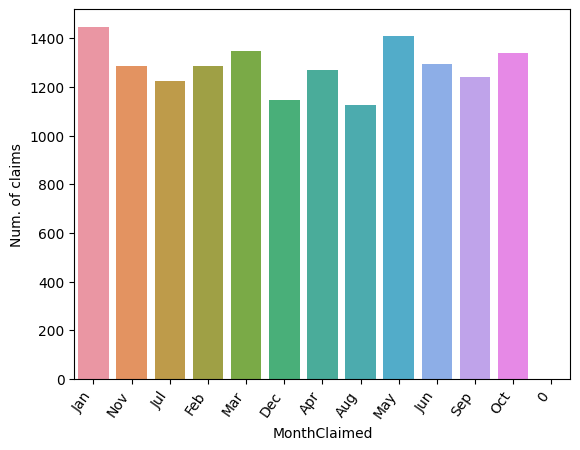

In [14]:
sns.countplot(data =df['Month'], x = df['MonthClaimed'])
plt.xticks(rotation = 55, horizontalalignment='right')
plt.ylabel('Num. of claims')
plt.show()

In [15]:
df['MonthName'] = pd.Categorical(df['Month'], ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
df['MonthName']

0        Dec
1        Jan
2        Oct
3        Jun
4        Jan
        ... 
15415    Nov
15416    Nov
15417    Nov
15418    Dec
15419    Dec
Name: MonthName, Length: 15420, dtype: category
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [16]:
df['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [17]:


print("The number of non fraudster claims is: ",len(df[df['FraudFound_P'] == 0]))
print("The number of fraudster claims is: ",len(df[df['FraudFound_P'] == 1]))
print("The number of total claims is: ",len(df['FraudFound_P']))



The number of non fraudster claims is:  14497
The number of fraudster claims is:  923
The number of total claims is:  15420


In [18]:
df[['Month','FraudFound_P']].groupby(['Month','FraudFound_P']).size().reset_index()

,Month,FraudFound_P,0
0,Apr,0,1200
1,Apr,1,80
2,Aug,0,1043
3,Aug,1,84
4,Dec,0,1223
5,Dec,1,62
6,Feb,0,1184
7,Feb,1,82
8,Jan,0,1324
9,Jan,1,87


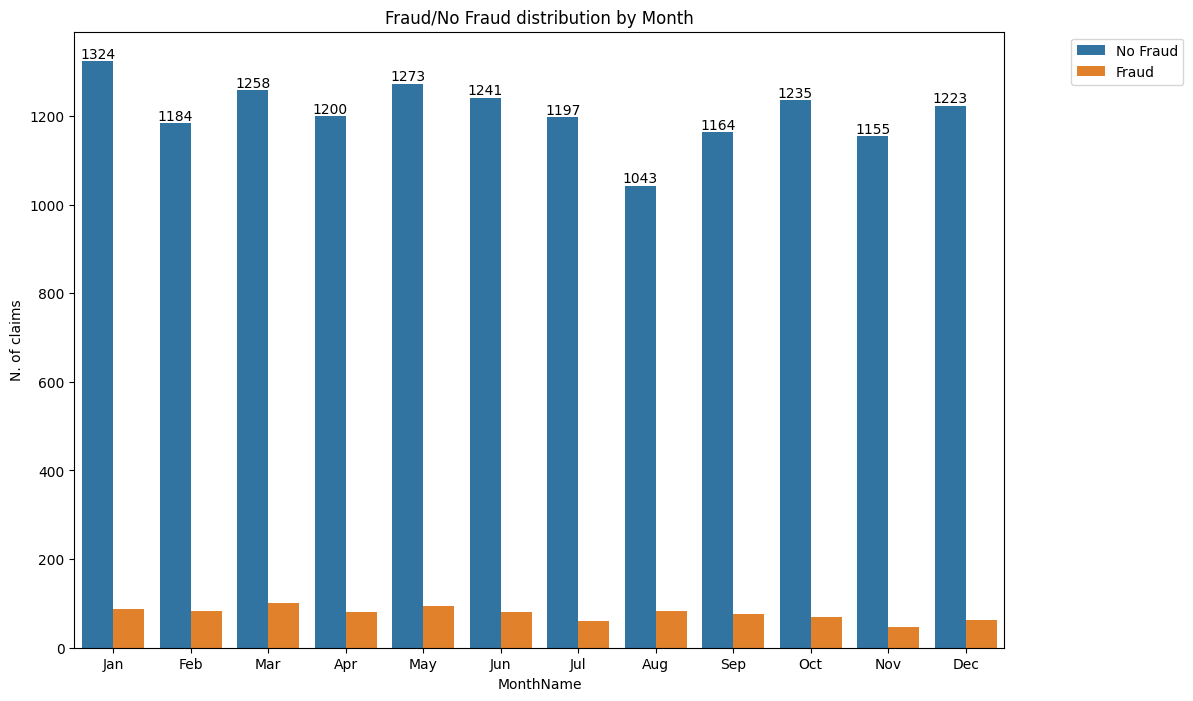

In [19]:
plt.figure(figsize=(12, 8))
labels = ['No Fraud', 'Fraud']
fig = sns.countplot(x="MonthName", hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0], label_type='edge');

plt.legend(labels,  bbox_to_anchor=(1.2, 1))
plt.title('Fraud/No Fraud distribution by Month')
plt.ylabel('N. of claims')
plt.show()

In [20]:
df.groupby(['AccidentArea']).size().reset_index().rename(columns={0:'Num_accidents'})

,AccidentArea,Num_accidents
0,Rural,1598
1,Urban,13822


In [21]:
Urban_claims=df.loc[df['AccidentArea']=='Urban'].groupby(['FraudFound_P']).size().reset_index().rename(index = {0:'No_Fraud',1:'Fraud'}, columns={0:'Num_accidents'})
Urban_claims

,FraudFound_P,Num_accidents
No_Fraud,0,13032
Fraud,1,790


In [22]:
Rural_claims=df.loc[df['AccidentArea']=='Rural'].groupby(['FraudFound_P']).size().reset_index().rename(index = {0:'No_Fraud',1:'Fraud'}, columns={0:'Num_accidents'})
Rural_claims

,FraudFound_P,Num_accidents
No_Fraud,0,1465
Fraud,1,133


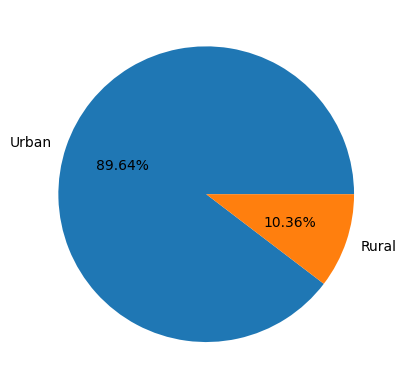

In [23]:
Accident_area = df.AccidentArea.value_counts().values
labels = ['Urban','Rural']
plt.pie(Accident_area, labels = labels, autopct = '%1.2f%%')
plt.show()

Most claims are coming from urban area than the Rural area

In [24]:
area = ['Rural', 'Urban']
df['AreaType'] = pd.Categorical(df['AccidentArea'], categories=area, ordered=True)
df = df.sort_values('AreaType')

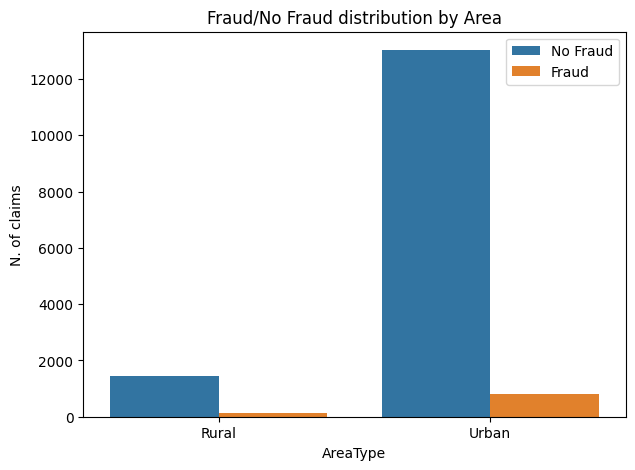

In [25]:

plt.figure(figsize=(7,5))
labels = ['No Fraud', 'Fraud']
sns.countplot(x="AreaType", hue ='FraudFound_P', data=df)
plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Area')
plt.ylabel('N. of claims')
plt.show()

The Graph shows most frauds have been recorded in urban areas

In [26]:
df['Sex'].value_counts()

Male      13000
Female     2420
Name: Sex, dtype: int64

In [27]:
df['DriverRating'].value_counts()

1    3944
3    3884
2    3801
4    3791
Name: DriverRating, dtype: int64

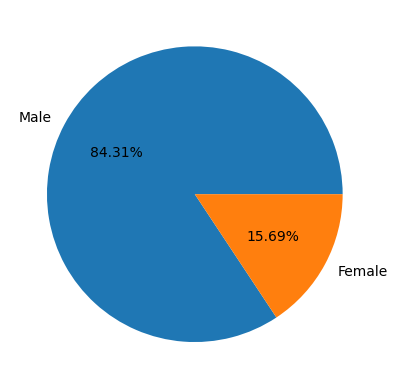

In [28]:
Sex = df['Sex'].value_counts()
labels = ['Male','Female']
plt.pie(Sex,labels = labels, autopct = '%1.2f%%')
plt.show()

Most of the claims are filed by Men compared to Women


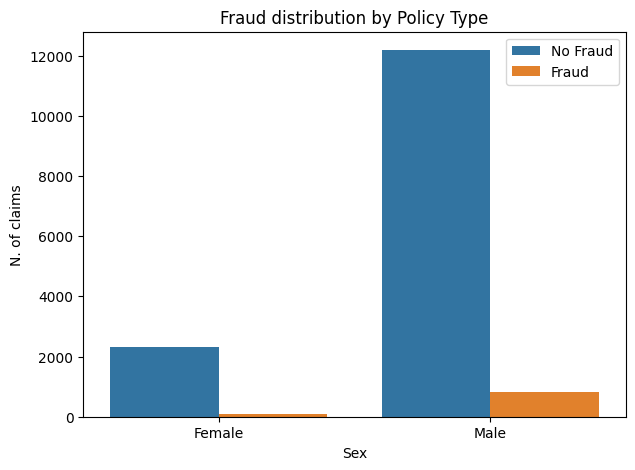

In [29]:
plt.figure(figsize=(7, 5))
labels = ['No Fraud', 'Fraud']
sns.countplot(x="Sex",hue="FraudFound_P" ,data=df)
plt.legend(labels)
plt.title('Fraud distribution by Policy Type')
plt.xlabel('Sex')
plt.ylabel('N. of claims')
plt.show()

From the graph, we can see the fraudelent claims have been given mostly by men :


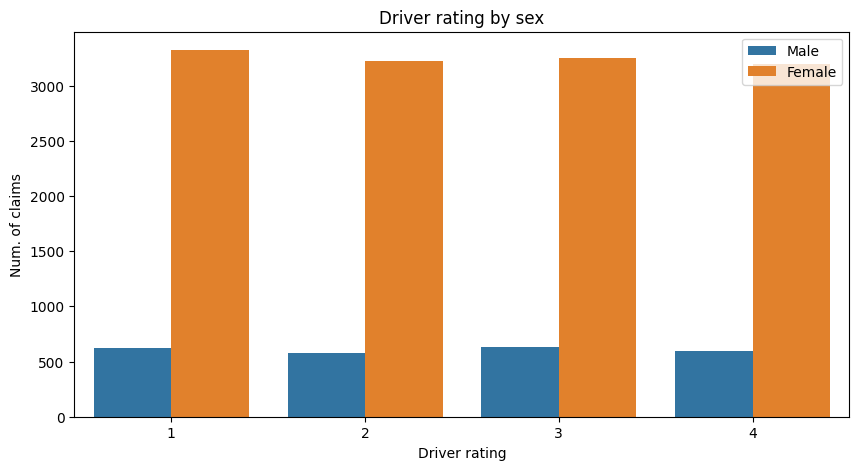

In [30]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'DriverRating', hue = 'Sex', data = df)
plt.legend(labels = ['Male','Female'], loc = 'upper right')
plt.ylabel('Num. of claims')
plt.xlabel('Driver rating')
plt.title('Driver rating by sex')
plt.show()

In [31]:
df['MaritalStatus'].value_counts()

Married     10625
Single       4684
Divorced       76
Widow          35
Name: MaritalStatus, dtype: int64

In [32]:
df.groupby(['MaritalStatus', 'FraudFound_P']).size().reset_index()

,MaritalStatus,FraudFound_P,0
0,Divorced,0,73
1,Divorced,1,3
2,Married,0,9986
3,Married,1,639
4,Single,0,4406
5,Single,1,278
6,Widow,0,32
7,Widow,1,3


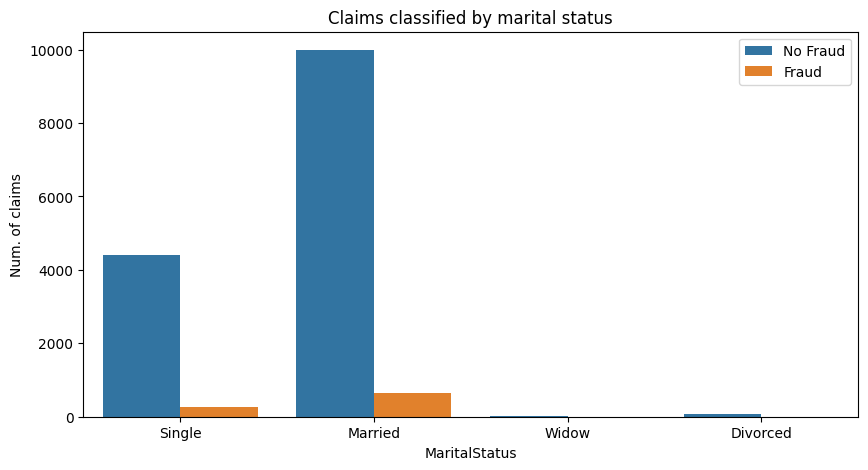

In [33]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'MaritalStatus', hue = 'FraudFound_P', data = df)
plt.title('Claims classified by marital status')
plt.legend(labels =['No Fraud','Fraud'])
plt.ylabel('Num. of claims')
plt.show()

Married people have given more fraudelent claims than the Other class pepople .


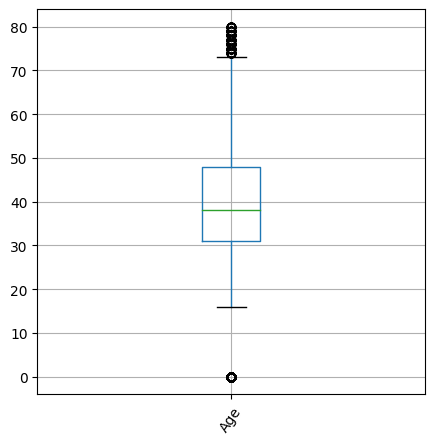

In [34]:
df.boxplot(column = 'Age',figsize=(5,5))
plt.xticks(rotation = 55)
plt.show()


In [35]:
df[df['Age'] < 16].count()

Month                   320
WeekOfMonth             320
DayOfWeek               320
Make                    320
AccidentArea            320
DayOfWeekClaimed        320
MonthClaimed            320
WeekOfMonthClaimed      320
Sex                     320
MaritalStatus           320
Age                     320
Fault                   320
PolicyType              320
VehicleCategory         320
VehiclePrice            320
FraudFound_P            320
PolicyNumber            320
RepNumber               320
Deductible              320
DriverRating            320
Days_Policy_Accident    320
Days_Policy_Claim       320
PastNumberOfClaims      320
AgeOfVehicle            320
AgeOfPolicyHolder       320
PoliceReportFiled       320
WitnessPresent          320
AgentType               320
NumberOfSuppliments     320
AddressChange_Claim     320
NumberOfCars            320
Year                    320
BasePolicy              320
MonthName               320
AreaType                320
dtype: int64

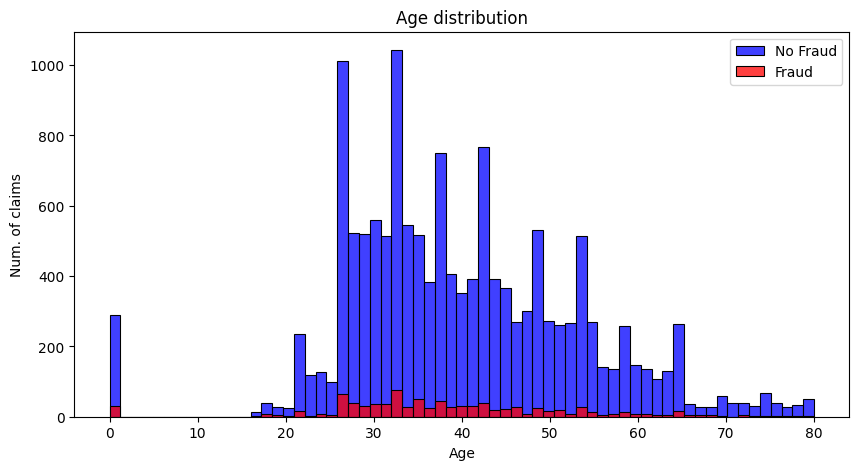

In [36]:
df_fraud1 = df.loc[df['FraudFound_P'] == 1]
df_no_fraud = df.loc[df['FraudFound_P'] == 0]
plt.figure(figsize=(10,5))
sns.histplot(data = df_no_fraud, x = 'Age', color = 'blue', bins = 65)
sns.histplot(data = df_fraud1, x = 'Age', color = 'red', bins = 65)
plt.title('Age distribution')
plt.legend(["No Fraud", "Fraud"])
plt.ylabel("Num. of claims")
plt.show()

From the plot, its clear that the fraudelent claims are given by people with age between 25-35 in general


In [37]:
df['Fault'].value_counts()

Policy Holder    11230
Third Party       4190
Name: Fault, dtype: int64

In [38]:
df.groupby(['Fault','FraudFound_P']).size().reset_index()

,Fault,FraudFound_P,0
0,Policy Holder,0,10344
1,Policy Holder,1,886
2,Third Party,0,4153
3,Third Party,1,37


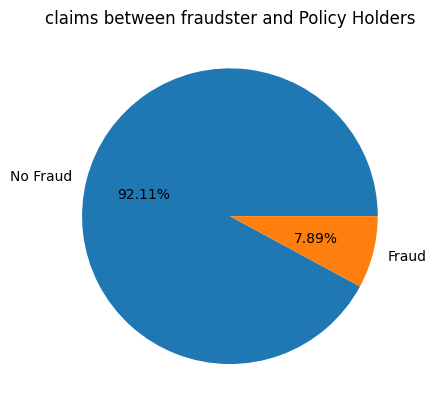

In [39]:
df_pol = df[(df['Fault']=='Policy Holder' )]
PolicyHolder = df_pol['FraudFound_P'].value_counts()
plt.title('claims between fraudster and Policy Holders')
plt.pie(PolicyHolder, labels = ['No Fraud', 'Fraud'],autopct = '%1.2f%%' )
plt.show()

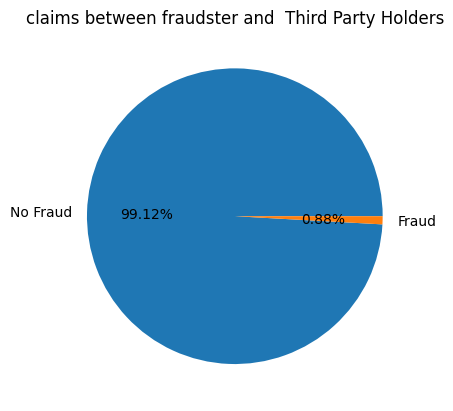

In [40]:
df_third = df[(df['Fault']=='Third Party' )]
PolicyHolder = df_third['FraudFound_P'].value_counts()
plt.title('claims between fraudster and  Third Party Holders')
plt.pie(PolicyHolder, labels = ['No Fraud', 'Fraud'],autopct = '%1.2f%%' )
plt.show()

From the plot, we can understand when the faults are of policy holder , then the chance for fraudelent is higher compared to third party faults.

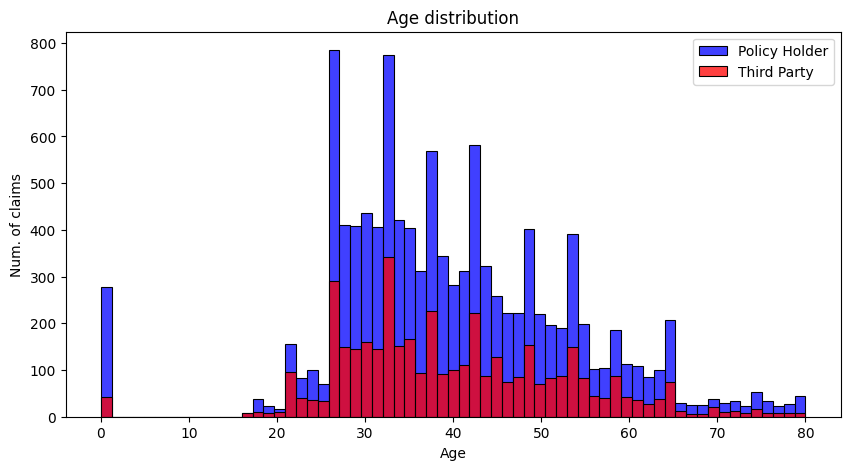

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(data = df_pol, x = 'Age', color = 'blue', bins = 65)
sns.histplot(data = df_third, x = 'Age', color = 'red',  bins = 65)
plt.title("Age distribution")
plt.legend(["Policy Holder", "Third Party"])
plt.ylabel("Num. of claims")
plt.show()

In [42]:
df.groupby(['PolicyType','FraudFound_P']).size().reset_index()

,PolicyType,FraudFound_P,0
0,Sedan - All Perils,0,3676
1,Sedan - All Perils,1,411
2,Sedan - Collision,0,5200
3,Sedan - Collision,1,384
4,Sedan - Liability,0,4951
5,Sedan - Liability,1,36
6,Sport - All Perils,0,22
7,Sport - Collision,0,300
8,Sport - Collision,1,48
9,Sport - Liability,0,1


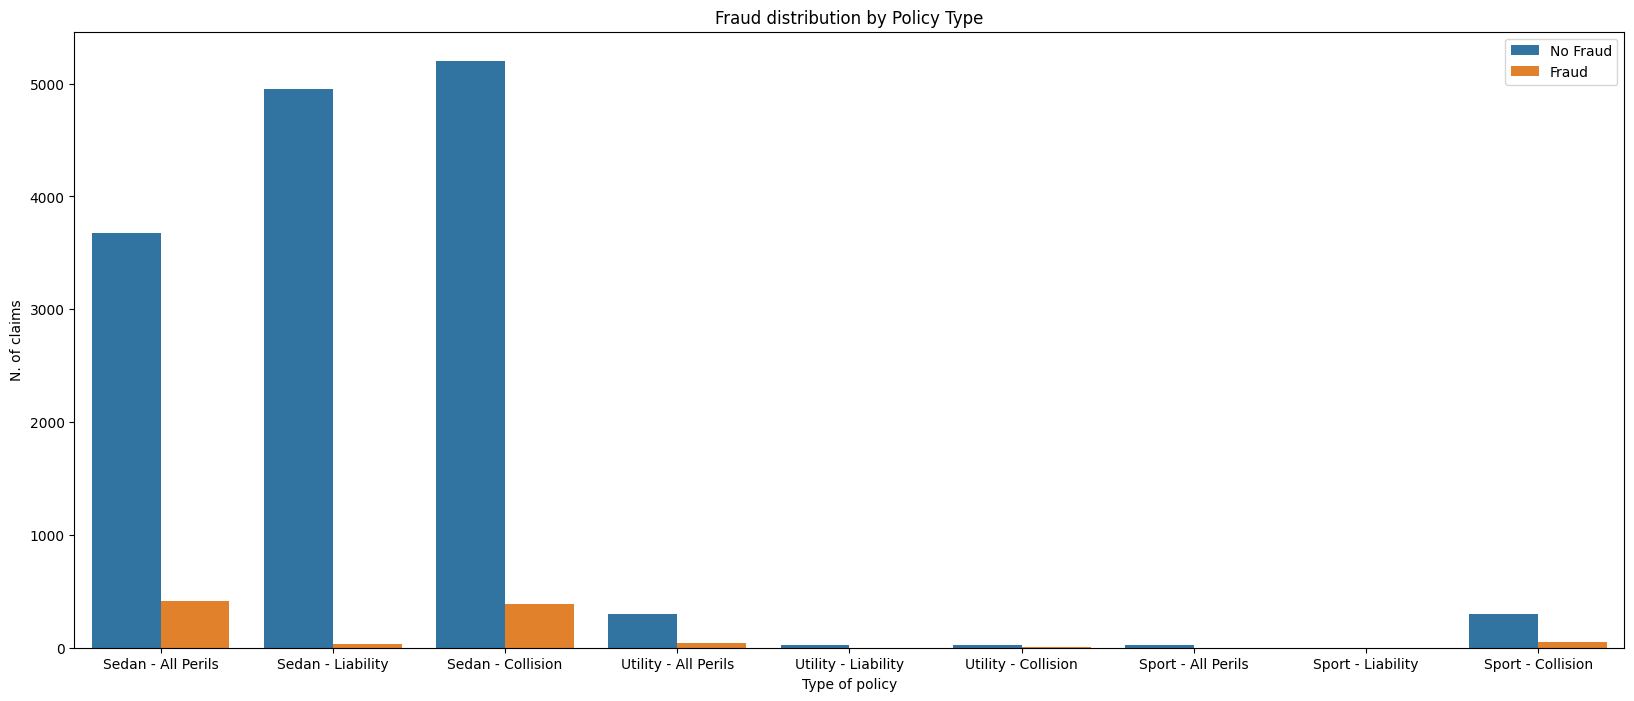

In [43]:
cats = ['Sedan - All Perils', 'Sedan - Liability', 'Sedan - Collision', 'Utility - All Perils', 'Utility - Liability', 'Utility - Collision',  'Sport - All Perils',   'Sport - Liability','Sport - Collision']
df['TypesPolicy'] = pd.Categorical(df['PolicyType'], categories=cats, ordered=True)
df = df.sort_values('TypesPolicy')

plt.figure(figsize=(20, 8))
labels = ['No Fraud', 'Fraud']
sns.countplot(x="TypesPolicy",hue="FraudFound_P" ,data=df)
plt.legend(labels)
plt.title('Fraud distribution by Policy Type')
plt.xlabel('Type of policy')
plt.ylabel('N. of claims')
plt.show()



In [44]:
df.groupby(['VehicleCategory','FraudFound_P']).size().reset_index().rename(columns = {0: 'Num of claims'})

,VehicleCategory,FraudFound_P,Num of claims
0,Sedan,0,8876
1,Sedan,1,795
2,Sport,0,5274
3,Sport,1,84
4,Utility,0,347
5,Utility,1,44


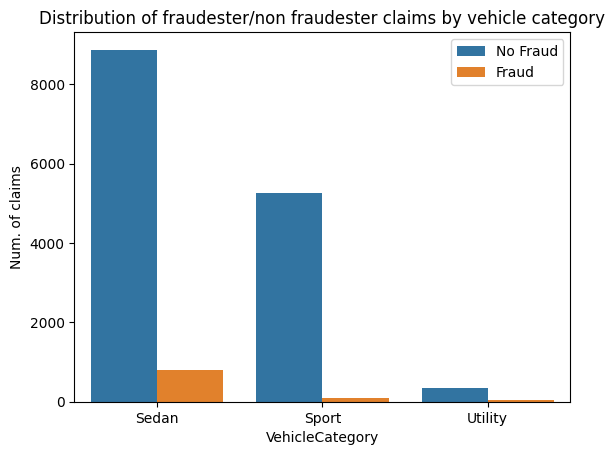

In [45]:
sns.countplot( x = 'VehicleCategory', hue = 'FraudFound_P', data = df)
plt.title('Distribution of fraudester/non fraudester claims by vehicle category')
plt.legend(['No Fraud','Fraud'])
plt.ylabel('Num. of claims')
plt.show()



Sedan vehicle types are used for fraudelent claims than other category of vehicles


In [46]:
df.groupby(['VehiclePrice']).size().reset_index().rename(columns = {0:'Num of claims'})

,VehiclePrice,Num of claims
0,20000 to 29000,8079
1,30000 to 39000,3533
2,40000 to 59000,461
3,60000 to 69000,87
4,less than 20000,1096
5,more than 69000,2164


In [47]:
Category_Fraud = df.groupby(['VehiclePrice','FraudFound_P']).size().reset_index().rename(columns = {0:'Num of claims'})

In [48]:
df['VehiclePrice'].unique()

array(['20000 to 29000', 'less than 20000', 'more than 69000',
       '30000 to 39000', '40000 to 59000', '60000 to 69000'], dtype=object)

In [49]:
price = [ 'less than 20000', '20000 to 29000', '30000 to 39000',
        '40000 to 59000', '60000 to 69000','more than 69000']
df['Prices'] = pd.Categorical(df['VehiclePrice'], categories=price, ordered=True)
df = df.sort_values('Prices')

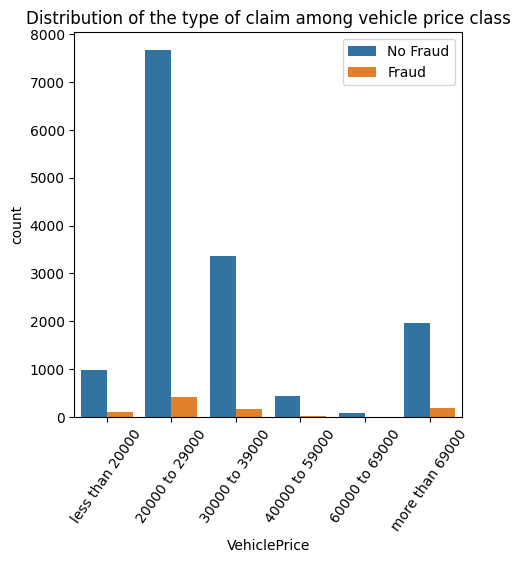

In [50]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'VehiclePrice', hue = 'FraudFound_P', data = df)
plt.xticks(rotation = 55)
plt.title('Distribution of the type of claim among vehicle price class')
plt.legend(['No Fraud','Fraud'])
plt.show()

In [51]:
df.groupby(['FraudFound_P']).size().reset_index().rename(columns={0:'Num'})

,FraudFound_P,Num
0,0,14497
1,1,923


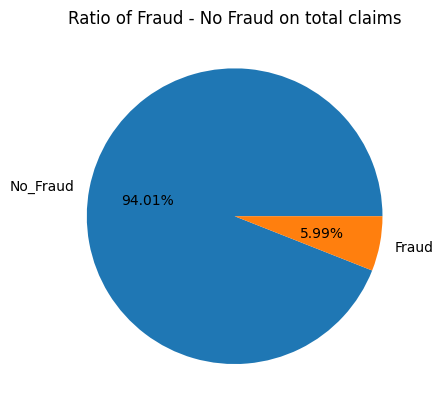

In [52]:
fraud_NoFraud = df.FraudFound_P.value_counts().values
labels = ['No_Fraud','Fraud']
plt.pie(fraud_NoFraud, labels = labels, autopct = '%1.2f%%')
plt.title('Ratio of Fraud - No Fraud on total claims')
plt.show()

In [53]:
df.groupby(['RepNumber']).size().reset_index()

,RepNumber,0
0,1,987
1,2,956
2,3,949
3,4,912
4,5,987
5,6,942
6,7,1069
7,8,931
8,9,999
9,10,986


<Axes: xlabel='RepNumber', ylabel='count'>

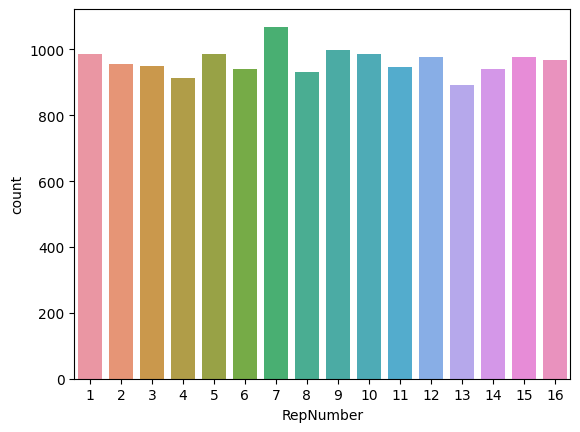

In [54]:
sns.countplot(x = 'RepNumber', data = df)

In [55]:
df.groupby(['PastNumberOfClaims','FraudFound_P']).size().reset_index().rename(columns = {0:'Num. of claims'})

,PastNumberOfClaims,FraudFound_P,Num. of claims
0,1,0,3351
1,1,1,222
2,2 to 4,0,5191
3,2 to 4,1,294
4,more than 4,0,1942
5,more than 4,1,68
6,none,0,4013
7,none,1,339


In [56]:
NumPastClaims = [ 'none', '1','2 to 4', 'more than 4']
df['NumPastClaims'] = pd.Categorical(df['PastNumberOfClaims'], categories=NumPastClaims, ordered=True)
df = df.sort_values('NumPastClaims')

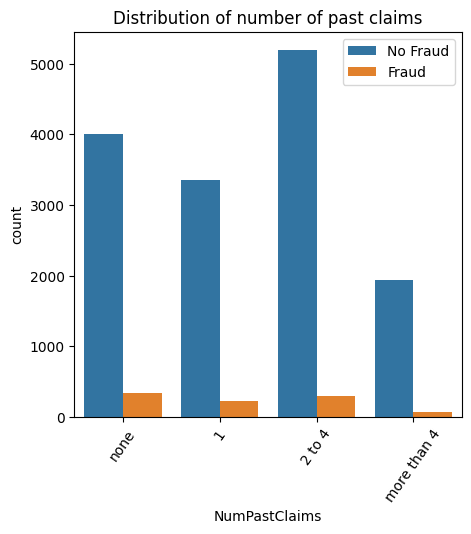

In [57]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'NumPastClaims', hue = 'FraudFound_P', data = df)
plt.xticks(rotation = 55)
plt.title('Distribution of number of past claims')
plt.legend(['No Fraud','Fraud'], loc ='upper right')
plt.show()

In [58]:
df['AgeOfVehicle'].unique()

array(['7 years', '6 years', '5 years', 'more than 7', '3 years',
       '4 years', '2 years', 'new'], dtype=object)

In [59]:
df.groupby(['AgeOfVehicle']).size().reset_index().rename(columns = {0:'Num of claims'})

,AgeOfVehicle,Num of claims
0,2 years,73
1,3 years,152
2,4 years,229
3,5 years,1357
4,6 years,3448
5,7 years,5807
6,more than 7,3981
7,new,373


In [60]:
VehicleAge = ['new','2 years','3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7']
df['VehicleAge'] = pd.Categorical(df['AgeOfVehicle'], categories=VehicleAge, ordered=True)
df = df.sort_values('VehicleAge')

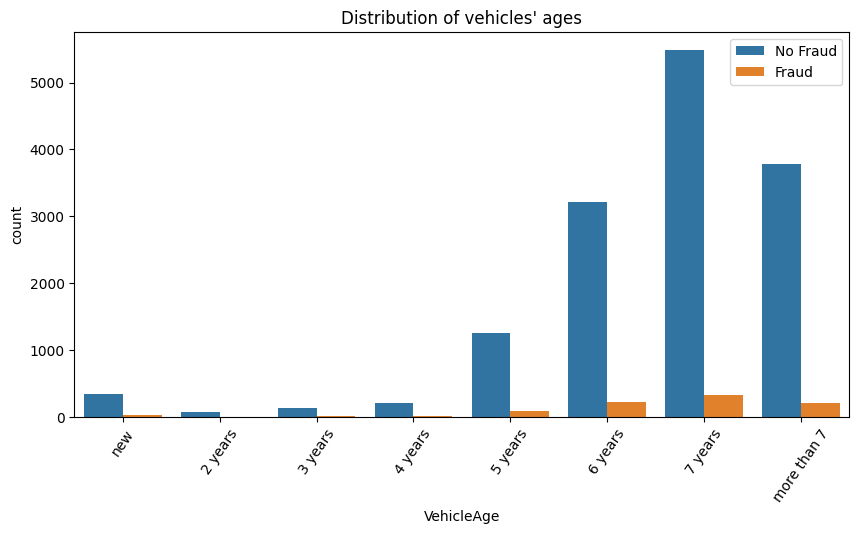

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'VehicleAge', hue = 'FraudFound_P', data = df)
plt.xticks(rotation = 55)
plt.title('Distribution of vehicles\' ages')
plt.legend(['No Fraud','Fraud'], loc ='upper right')
plt.show()

As the Age of vehicle increases chances of fraud also increases

In [62]:
df['PoliceReportFiled'].value_counts()

No     14992
Yes      428
Name: PoliceReportFiled, dtype: int64

In [63]:
df.groupby(['PoliceReportFiled','FraudFound_P']).size().reset_index().rename(columns = {0: 'Num. of claims'})

,PoliceReportFiled,FraudFound_P,Num. of claims
0,No,0,14085
1,No,1,907
2,Yes,0,412
3,Yes,1,16


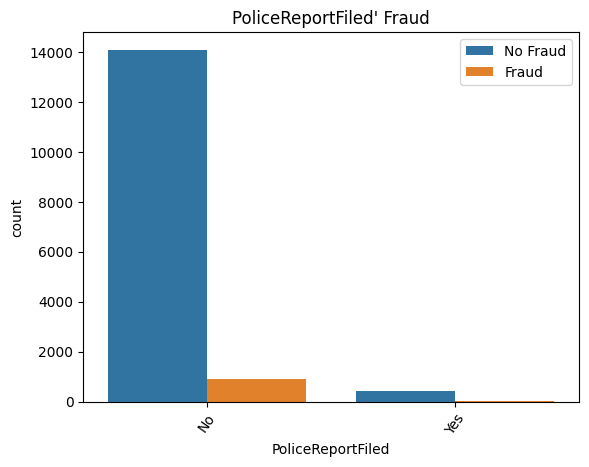

In [64]:
sns.countplot(x = 'PoliceReportFiled', hue = 'FraudFound_P', data = df)
plt.xticks(rotation = 55)
plt.title('PoliceReportFiled\' Fraud')
plt.legend(['No Fraud','Fraud'], loc ='upper right')
plt.show()

When police report is not filed , the chances of fraudelncy is more


In [65]:
df['WitnessPresent'].value_counts()

No     15333
Yes       87
Name: WitnessPresent, dtype: int64

In [66]:
df.groupby(['WitnessPresent','FraudFound_P']).size().reset_index()

,WitnessPresent,FraudFound_P,0
0,No,0,14413
1,No,1,920
2,Yes,0,84
3,Yes,1,3


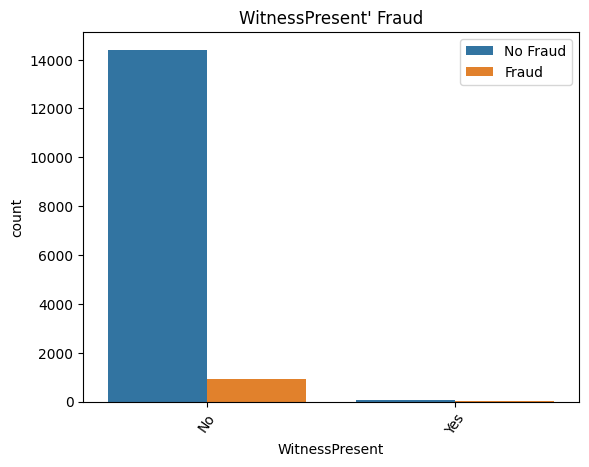

In [67]:
sns.countplot(x = 'WitnessPresent', hue = 'FraudFound_P', data = df)
plt.xticks(rotation = 55)
plt.title('WitnessPresent\' Fraud')
plt.legend(['No Fraud','Fraud'], loc ='upper right')
plt.show()

When the witnesses were absent, those cases had more fraudelent claims

In [68]:
df['AgentType'].value_counts()

External    15179
Internal      241
Name: AgentType, dtype: int64

In [69]:
df.groupby(['AgentType','FraudFound_P']).size().reset_index().rename(columns={0:'Num of claims'})

,AgentType,FraudFound_P,Num of claims
0,External,0,14260
1,External,1,919
2,Internal,0,237
3,Internal,1,4


In [70]:
df.groupby(['NumberOfSuppliments','FraudFound_P']).size().reset_index().rename(columns={0:'Num of claims'})

,NumberOfSuppliments,FraudFound_P,Num of claims
0,1 to 2,0,2330
1,1 to 2,1,159
2,3 to 5,0,1920
3,3 to 5,1,97
4,more than 5,0,3672
5,more than 5,1,195
6,none,0,6575
7,none,1,472


In [71]:
Suppliments = ['none','1 to 2','3 to 5', 'more than 5']
df['Suppliments'] = pd.Categorical(df['NumberOfSuppliments'], categories=Suppliments, ordered=True)
df = df.sort_values('Suppliments')

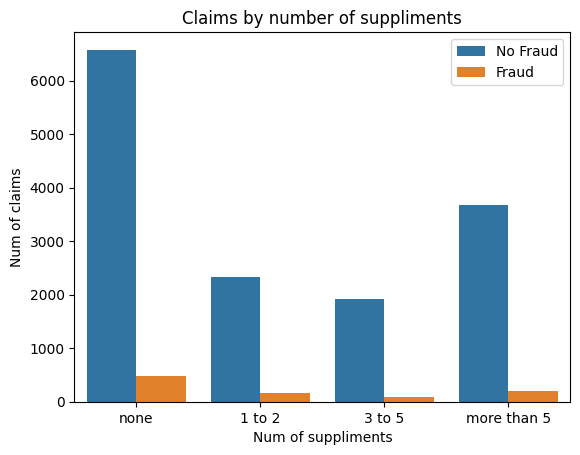

In [72]:
sns.countplot(x = 'Suppliments', hue = 'FraudFound_P', data = df)
plt.title('Claims by number of suppliments')
plt.legend(['No Fraud','Fraud'])
plt.xlabel('Num of suppliments')
plt.ylabel('Num of claims')
plt.show()

When the suppliments are none , the chances of fraudelents increases

In [73]:
df['AddressChange_Claim'].unique()


array(['no change', '2 to 3 years', '4 to 8 years', '1 year',
       'under 6 months'], dtype=object)

In [74]:
df.groupby(['AddressChange_Claim','FraudFound_P']).size().reset_index().rename(columns={0:'Num of claims'})

,AddressChange_Claim,FraudFound_P,Num of claims
0,1 year,0,159
1,1 year,1,11
2,2 to 3 years,0,240
3,2 to 3 years,1,51
4,4 to 8 years,0,598
5,4 to 8 years,1,33
6,no change,0,13499
7,no change,1,825
8,under 6 months,0,1
9,under 6 months,1,3


In [75]:
AddressChange = ['no change', 'under 6 months', '1 year', '2 to 3 years','4 to 8 years']
df['AddressChange'] = pd.Categorical(df['AddressChange_Claim'], categories=AddressChange, ordered=True)
df = df.sort_values('AddressChange')

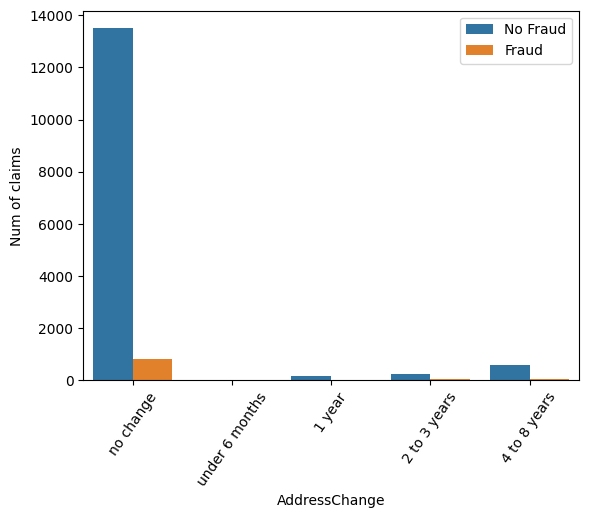

In [76]:
sns.countplot(x = 'AddressChange', hue = 'FraudFound_P', data = df)
plt.legend(['No Fraud','Fraud'])
plt.xticks(rotation=55)
plt.ylabel('Num of claims')
plt.show()

In [77]:
df.groupby(['NumberOfCars','FraudFound_P']).size().reset_index().rename(columns={0:'Num of claims'})

,NumberOfCars,FraudFound_P,Num of claims
0,1 vehicle,0,13466
1,1 vehicle,1,850
2,2 vehicles,0,666
3,2 vehicles,1,43
4,3 to 4,0,343
5,3 to 4,1,29
6,5 to 8,0,20
7,5 to 8,1,1
8,more than 8,0,2


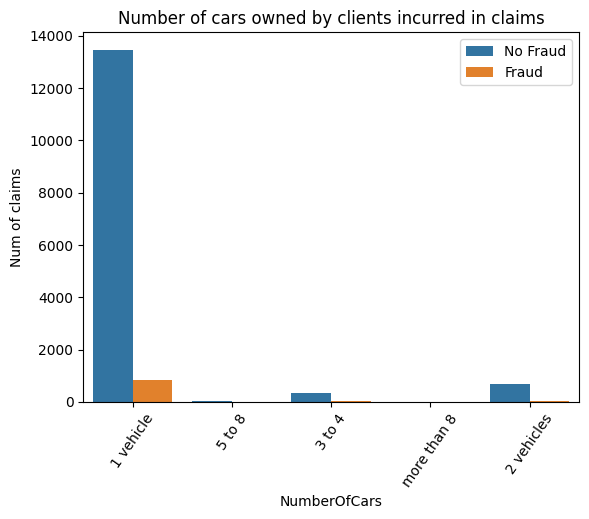

In [78]:
sns.countplot(x = 'NumberOfCars', hue = 'FraudFound_P', data = df)
plt.title('Number of cars owned by clients incurred in claims')
plt.legend(['No Fraud','Fraud'])
plt.xticks(rotation=55)
plt.ylabel('Num of claims')
plt.show()

From the graph , we can see people with more than 4 car are not doing fraudelant claims

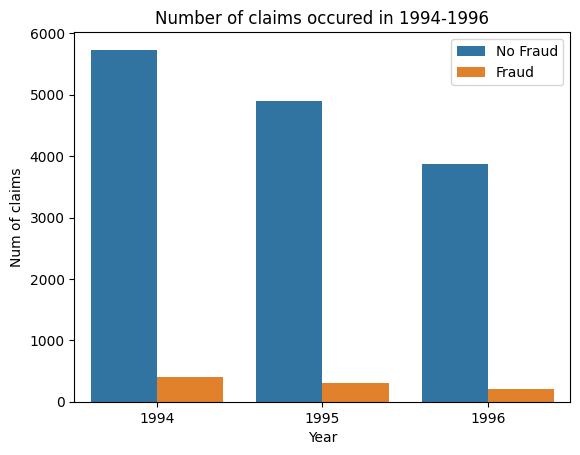

In [79]:
sns.countplot(x='Year', hue='FraudFound_P', data=df)
plt.title('Number of claims occured in 1994-1996')
plt.ylabel('Num of claims')
plt.legend(['No Fraud','Fraud'])
plt.show()



:From the graph, we can understand that as the years move forward the claims and the frauds are decreasing

In [80]:
df_new = df.drop(columns= ['MonthName', 'AreaType', 'TypesPolicy', 'Prices', 'NumPastClaims', 'VehicleAge', 'Suppliments', 'AddressChange'])


In [81]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15420 entries, 10834 to 10731
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-

Removing 0's in DayOfWeekClaimed and MonthClaimed

In [82]:
print(df_new.loc[(df['DayOfWeekClaimed']=='0')])
print(df_new.loc[(df['MonthClaimed']=='0')])

     Month  WeekOfMonth DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
1516   Jul            2    Monday  Honda        Rural                0   

     MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  ...  AgeOfVehicle  \
1516            0                   1  Male        Single  ...           new   

     AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
1516          16 to 17                No             No  External   

      NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
1516                 none            no change     1 vehicle  1994  All Perils  

[1 rows x 33 columns]
     Month  WeekOfMonth DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
1516   Jul            2    Monday  Honda        Rural                0   

     MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  ...  AgeOfVehicle  \
1516            0                   1  Male        Single  ...           new   

     AgeOfPolicyHolder PoliceReportFiled WitnessPresent 

In [83]:
df2 = df_new.loc[df['DayOfWeekClaimed']!='0']
df2.reset_index(drop=True, inplace=True)
len(df2)

15419

filling the '0' in the age coloumn


In [84]:
print(len(df2[df2['Age']==0]))

319


we have found that a single row have two 0 values in them , so we would delete the entire row rather than filling the null values. Then the age coloumn we will replace with age 16.



In [85]:
for index, value in enumerate(df2['Age']):
        if value == 0:
            df2.loc[index, 'Age'] = 16

In [86]:
print(len(df2[df2['Age']==0]))

0


In [87]:
print(len(df2.drop_duplicates())==len(df2))


True


In [88]:
df2 = df2.drop(columns=['PolicyType','PolicyNumber','RepNumber'])


In [89]:
df2 = df2.drop(columns= ['WeekOfMonth', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Deductible', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'AgeOfPolicyHolder', 'AgentType', 'AddressChange_Claim','DayOfWeek'])


In [90]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Month                15419 non-null  object
 1   Make                 15419 non-null  object
 2   AccidentArea         15419 non-null  object
 3   Sex                  15419 non-null  object
 4   MaritalStatus        15419 non-null  object
 5   Age                  15419 non-null  int64 
 6   Fault                15419 non-null  object
 7   VehicleCategory      15419 non-null  object
 8   VehiclePrice         15419 non-null  object
 9   FraudFound_P         15419 non-null  int64 
 10  PastNumberOfClaims   15419 non-null  object
 11  AgeOfVehicle         15419 non-null  object
 12  PoliceReportFiled    15419 non-null  object
 13  WitnessPresent       15419 non-null  object
 14  NumberOfSuppliments  15419 non-null  object
 15  NumberOfCars         15419 non-null  object
 16  Year

In [91]:
df2['NumberOfCars'].unique()

array(['1 vehicle', '5 to 8', '3 to 4', 'more than 8', '2 vehicles'],
      dtype=object)

**ENCODING

**bold text**

# ENCODING

In [92]:
columns_to_encode = ['Month', 'Make', 'AccidentArea', 'Sex', 'MaritalStatus',
                     'Fault', 'VehicleCategory', 'VehiclePrice',
                     'PastNumberOfClaims', 'AgeOfVehicle',
                     'PoliceReportFiled', 'WitnessPresent',
                     'NumberOfSuppliments', 'NumberOfCars', 'BasePolicy']


In [93]:
label_encoders = {}
for column in columns_to_encode:
    le = LabelEncoder()
    df2[column] = le.fit_transform(df2[column])
    label_encoders[column] = le

In [94]:
df2.head()

,Month,Make,AccidentArea,Sex,MaritalStatus,Age,Fault,VehicleCategory,VehiclePrice,FraudFound_P,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,NumberOfSuppliments,NumberOfCars,Year,BasePolicy
0,3,6,1,1,2,16,0,1,5,0,1,7,0,0,3,0,1995,2
1,7,13,1,1,1,54,0,1,0,0,2,6,0,0,1,0,1994,2
2,2,2,1,1,2,49,0,0,1,0,1,6,0,0,1,0,1995,0
3,9,6,1,1,1,26,0,1,0,0,1,4,0,0,1,0,1996,2
4,2,16,1,1,2,27,0,0,2,0,3,4,0,0,1,0,1996,0


In [95]:
import pickle
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
from google.colab import files


In [96]:
files.download('label_encoders.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

label encoding

In [97]:
df2.head()

,Month,Make,AccidentArea,Sex,MaritalStatus,Age,Fault,VehicleCategory,VehiclePrice,FraudFound_P,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,NumberOfSuppliments,NumberOfCars,Year,BasePolicy
0,3,6,1,1,2,16,0,1,5,0,1,7,0,0,3,0,1995,2
1,7,13,1,1,1,54,0,1,0,0,2,6,0,0,1,0,1994,2
2,2,2,1,1,2,49,0,0,1,0,1,6,0,0,1,0,1995,0
3,9,6,1,1,1,26,0,1,0,0,1,4,0,0,1,0,1996,2
4,2,16,1,1,2,27,0,0,2,0,3,4,0,0,1,0,1996,0


In [98]:
df2.dtypes


Month                  int64
Make                   int64
AccidentArea           int64
Sex                    int64
MaritalStatus          int64
Age                    int64
Fault                  int64
VehicleCategory        int64
VehiclePrice           int64
FraudFound_P           int64
PastNumberOfClaims     int64
AgeOfVehicle           int64
PoliceReportFiled      int64
WitnessPresent         int64
NumberOfSuppliments    int64
NumberOfCars           int64
Year                   int64
BasePolicy             int64
dtype: object

# SCALING


In [99]:
from sklearn.preprocessing import MinMaxScaler
import pickle
from google.colab import files

scaler = MinMaxScaler()
df2[['Age']] = scaler.fit_transform(df2[['Age']])


In [100]:
with open('minmax_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
files.download('minmax_scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month                15419 non-null  int64  
 1   Make                 15419 non-null  int64  
 2   AccidentArea         15419 non-null  int64  
 3   Sex                  15419 non-null  int64  
 4   MaritalStatus        15419 non-null  int64  
 5   Age                  15419 non-null  float64
 6   Fault                15419 non-null  int64  
 7   VehicleCategory      15419 non-null  int64  
 8   VehiclePrice         15419 non-null  int64  
 9   FraudFound_P         15419 non-null  int64  
 10  PastNumberOfClaims   15419 non-null  int64  
 11  AgeOfVehicle         15419 non-null  int64  
 12  PoliceReportFiled    15419 non-null  int64  
 13  WitnessPresent       15419 non-null  int64  
 14  NumberOfSuppliments  15419 non-null  int64  
 15  NumberOfCars         15419 non-null 

# Modeling

Splitting depeendent and independent variables


In [102]:
X = df2.drop(['FraudFound_P'],axis = 1)
y = df2['FraudFound_P']

In [103]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month                15419 non-null  int64  
 1   Make                 15419 non-null  int64  
 2   AccidentArea         15419 non-null  int64  
 3   Sex                  15419 non-null  int64  
 4   MaritalStatus        15419 non-null  int64  
 5   Age                  15419 non-null  float64
 6   Fault                15419 non-null  int64  
 7   VehicleCategory      15419 non-null  int64  
 8   VehiclePrice         15419 non-null  int64  
 9   PastNumberOfClaims   15419 non-null  int64  
 10  AgeOfVehicle         15419 non-null  int64  
 11  PoliceReportFiled    15419 non-null  int64  
 12  WitnessPresent       15419 non-null  int64  
 13  NumberOfSuppliments  15419 non-null  int64  
 14  NumberOfCars         15419 non-null  int64  
 15  Year                 15419 non-null 

In [105]:
print('No. of rows and columns in x_train : ', X_train.shape)
print('No. of rows and columns in x_test : ', X_test.shape)
print('No. of rows and columns in y_train : ', y_train.shape)
print('No. of rows and columns in y_test : ', y_test.shape)

No. of rows and columns in x_train :  (12335, 17)
No. of rows and columns in x_test :  (3084, 17)
No. of rows and columns in y_train :  (12335,)
No. of rows and columns in y_test :  (3084,)


In [106]:
y_train.value_counts()


0    11603
1      732
Name: FraudFound_P, dtype: int64

In [107]:
y_test.value_counts()


0    2893
1     191
Name: FraudFound_P, dtype: int64

Over Sampling

In [108]:
#as we found that the data is imbalanced, we try to over sample the data to avoid bias
oversample = SMOTE(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X_train, y_train)
print('After Oversampling:\n',y_over.value_counts())

After Oversampling:
 0    11603
1     5801
Name: FraudFound_P, dtype: int64


In [109]:
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)


Under Sampling

In [110]:
#under sampling the data
join_train = pd.concat([X_train, y_train], axis=1)
claim = join_train[join_train['FraudFound_P']==1]
no_claim = join_train[join_train['FraudFound_P']==0]

undersample_noclaim = no_claim.sample(len(claim)*2)
join_train2 = pd.concat([claim,undersample_noclaim])

print("Before Undersample:\n", join_train['FraudFound_P'].value_counts())
print("After Undersample:\n", join_train2['FraudFound_P'].value_counts())

X_under = join_train2.drop(columns='FraudFound_P')
y_under = join_train2['FraudFound_P']

Before Undersample:
 0    11603
1      732
Name: FraudFound_P, dtype: int64
After Undersample:
 0    1464
1     732
Name: FraudFound_P, dtype: int64


In [111]:
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42
                                                                            )


LR

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_over_scaled = scaler.fit_transform(X_over)
X_under_scaled = scaler.fit_transform(X_under)
LR = LogisticRegression(solver='liblinear')
cv_normal = cross_val_score(LR, X_scaled, y, cv=5)
cv_over = cross_val_score(LR, X_over_scaled, y_over, cv=5)
cv_under = cross_val_score(LR, X_under_scaled, y_under, cv=5)

In [113]:
print("Accuracy on normal data",(cv_normal*100 ))
print("Accuracy on over sample data",(cv_over*100 ))
print("Accuracy on under sample data:", cv_under * 100)



Accuracy on normal data [94.03372244 94.00129702 94.00129702 94.00129702 94.03178722]
Accuracy on over sample data [74.92099971 81.75811548 80.92502155 81.47084171 80.97701149]
Accuracy on under sample data: [73.86363636 72.8929385  71.29840547 73.80410023 71.75398633]


In [114]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score



Normal

In [115]:
LR_normal = LR.fit(X_train, y_train)
LR_y_normal_pred = LR_normal.predict(X_test)
LR_Acc_normal = accuracy_score(LR_y_normal_pred, y_test)*100
LR_Rec_normal = recall_score(LR_y_normal_pred, y_test)*100
LR_Pre_normal = precision_score(LR_y_normal_pred, y_test)*100


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Over Sampling

In [116]:
LR_over = LogisticRegression()
LR_over = LR.fit(X_over_train, y_over_train)
LR_y_over_pred = LR_over.predict(X_over_test)
LR_Acc_over = accuracy_score(LR_y_over_pred, y_over_test)*100
LR_Rec_over = recall_score(LR_y_over_pred, y_over_test)*100
LR_Pre_over = precision_score(LR_y_over_pred, y_over_test)*100

In [117]:
import pickle
model_filename = 'logistic_regression_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(LR_over, model_file)
from google.colab import files
files.download(model_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Under Sampling

In [118]:
LR_under = LR.fit(X_under_train, y_under_train)
LR_y_under_pred = LR_under.predict(X_under_test)
LR_Acc_under = accuracy_score(LR_y_under_pred, y_under_test)*100
LR_Rec_under = recall_score(LR_y_under_pred, y_under_test)*100
LR_Pre_under = precision_score(LR_y_under_pred, y_under_test)*100


SVM
  

In [119]:
from sklearn.svm import SVC
svm = SVC()




Normal _ SVM

In [120]:
svm_normal = svm.fit(X_train, y_train)
svm_y_normal_pred = svm_normal.predict(X_test)
svm_Acc_normal = accuracy_score(svm_y_normal_pred, y_test)*100
svm_Rec_normal = recall_score(svm_y_normal_pred, y_test)*100
svm_Pre_normal = precision_score(svm_y_normal_pred, y_test)*100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM- Over


In [121]:
svm_over = svm.fit(X_over_train, y_over_train)
svm_y_over_pred = svm_over.predict(X_test)
svm_Acc_over = accuracy_score(svm_y_over_pred, y_test)*100
svm_Rec_over = recall_score(svm_y_over_pred, y_test)*100
svm_Pre_over = precision_score(svm_y_over_pred, y_test)*100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Under

In [122]:
svm_under = svm.fit(X_under_train, y_under_train)
svm_y_under_pred = svm_under.predict(X_test)
svm_Acc_under = accuracy_score(svm_y_under_pred, y_test)*100
svm_Rec_under = recall_score(svm_y_under_pred, y_test)*100
svm_Pre_under = precision_score(svm_y_under_pred, y_test)*100

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()


Normal

In [124]:
DT_normal = DT.fit(X_train, y_train)
DT_y_normal_pred = DT_normal.predict(X_test)
DT_Acc_normal = accuracy_score(DT_y_normal_pred, y_test)*100
DT_Rec_normal = recall_score(DT_y_normal_pred, y_test)*100
DT_Pre_normal = precision_score(DT_y_normal_pred, y_test)*100


Decision Tree - over sampling

In [125]:

DT_over = DT.fit(X_over_train, y_over_train)
DT_y_over_pred = DT_over.predict(X_test)
DT_Acc_over = accuracy_score(DT_y_over_pred, y_test)*100
DT_Rec_over = recall_score(DT_y_over_pred, y_test)*100
DT_Pre_over = precision_score(DT_y_over_pred, y_test)*100



Decision Tree - Under Sampling


In [126]:
DT_under = DT.fit(X_under_train, y_under_train)
DT_y_under_pred = DT_under.predict(X_test)
DT_Acc_under = accuracy_score(DT_y_under_pred, y_test)*100
DT_Rec_under = recall_score(DT_y_under_pred, y_test)*100
DT_Pre_under = precision_score(DT_y_under_pred, y_test)*100

RANDOMFOREST

In [127]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

Normal

In [128]:
RF_normal = RF.fit(X_train, y_train)
RF_y_normal_pred = RF_normal.predict(X_test)
RF_Acc_normal = accuracy_score(RF_y_normal_pred, y_test)*100
RF_Rec_normal = recall_score(RF_y_normal_pred, y_test)*100
RF_Pre_normal = precision_score(RF_y_normal_pred, y_test)*100



Over sampling - RF

In [129]:
RF_over = RF.fit(X_over_train, y_over_train)
y_over_pred = RF_over.predict(X_test)
RF_Acc_over = accuracy_score(y_over_pred, y_test)*100
RF_Rec_over = recall_score(y_over_pred, y_test)*100
RF_Pre_over = precision_score(y_over_pred, y_test)*100



Under Sampling - RF

In [130]:
RF_under = RF.fit(X_under_train, y_under_train)
RF_y_under_pred = RF_under.predict(X_test)
RF_Acc_under = accuracy_score(RF_y_under_pred, y_test)*100
RF_Rec_under = recall_score(RF_y_under_pred, y_test)*100
RF_Pre_under = precision_score(RF_y_under_pred, y_test)*100

XGBbooster

In [131]:
from xgboost import XGBClassifier
XGB = XGBClassifier()

Normal

In [132]:

xgb_normal= XGB.fit(X_train, y_train)
xgb_y_normal_pred = xgb_normal.predict(X_test)
xgb_Acc_normal = accuracy_score(xgb_y_normal_pred, y_test) * 100
xgb_Rec_normal = recall_score(xgb_y_normal_pred, y_test) * 100
xgb_Pre_normal = precision_score(xgb_y_normal_pred, y_test) * 100


Over Sampling

In [133]:
xgb_over = XGB.fit(X_over_train, y_over_train)
xgb_y_over_pred = xgb_over.predict(X_test)
xgb_Acc_over = accuracy_score(xgb_y_over_pred, y_test) * 100
xgb_Rec_over = recall_score(xgb_y_over_pred, y_test) * 100
xgb_Pre_over = precision_score(xgb_y_over_pred, y_test) * 100


Under Sampling

In [134]:
xgb_under= XGB.fit(X_under_train, y_under_train)
xgb_y_under_pred = xgb_under.predict(X_test)
xgb_Acc_under = accuracy_score(xgb_y_under_pred, y_test) * 100
xgb_Rec_under = recall_score(xgb_y_under_pred, y_test) * 100
xgb_Pre_under = precision_score(xgb_y_under_pred, y_test) * 100

Printing All Accuracies

In [135]:
data = {'Classifiers': ['LogisticRegression_Normal','SVM_Normal','DecisionTreeClassifier_Normal' ,'RandomForestClassifier_Normal' ,'XGBClassifier_Normal',
                        'LogisticRegression_Over','SVM_Over','DecisionTreeClassifier_Over' ,'RandomForestClassifier_Over' ,'XGBClassifier_Over' ,
                        'LogisticRegression_Under','SVM_Under','DecisionTreeClassifier_Under' ,'RandomForestClassifier_Under' ,'XGBClassifier_Under'],

               'Accuracy': [LR_Acc_normal, svm_Acc_normal,DT_Acc_normal,RF_Acc_normal,xgb_Acc_normal,
                            LR_Acc_over, svm_Acc_over,DT_Acc_over,RF_Acc_over,xgb_Acc_over,
                            LR_Acc_under,svm_Acc_under,DT_Acc_under,RF_Acc_under,xgb_Acc_under],

                'Recall': [LR_Rec_normal, svm_Rec_normal,DT_Rec_normal,RF_Rec_normal,xgb_Rec_normal,
                           LR_Rec_over, svm_Rec_over,DT_Rec_over,RF_Rec_over,xgb_Rec_over,
                           LR_Rec_under,svm_Rec_under,DT_Rec_under,RF_Rec_under,xgb_Rec_under],

                'Preision': [LR_Pre_normal, svm_Pre_normal,DT_Pre_normal,RF_Pre_normal,xgb_Pre_normal,
                             LR_Pre_over, svm_Pre_over,DT_Pre_over,RF_Pre_over,xgb_Pre_over,
                             LR_Pre_under,svm_Pre_under,DT_Pre_under,RF_Pre_under,xgb_Pre_under]
       }
Accuracies = pd.DataFrame(data=data)
Accuracies.set_index('Classifiers', inplace=True)
Accuracies

,Accuracy,Recall,Preision
Classifiers,,,
LogisticRegression_Normal,93.806744,0.000000,0.000000
SVM_Normal,93.806744,0.000000,0.000000
DecisionTreeClassifier_Normal,88.197147,14.693878,18.848168
RandomForestClassifier_Normal,93.774319,45.454545,2.617801
XGBClassifier_Normal,93.482490,32.142857,4.712042
LogisticRegression_Over,78.167193,67.241379,65.000000
SVM_Over,93.806744,0.000000,0.000000
DecisionTreeClassifier_Over,84.306096,12.531969,25.654450
RandomForestClassifier_Over,89.850843,22.018349,25.130890


Importing Pickel File

In [136]:
import pickle
from google.colab import files


In [137]:
with open('xgb_classifier_model.pkl', 'wb') as file:
    pickle.dump(xgb_normal, file)


In [138]:
file_path = 'xgb_classifier_model.pkl'

In [139]:
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>